In [1]:
import pandas as pd
data= pd.read_csv("TrainingDataCifar100Vgg19Size50.csv")
data_test=pd.read_csv("TestingDataCifar100Vgg19Size50.csv")

# Classifier

In [2]:
#github
classLabel = "Class Label"

X = data.drop(classLabel,axis = 1).values
Y = data[classLabel].values

X_t= data_test.drop(classLabel,axis = 1).values
y_test= data_test[classLabel].values

In [3]:
Features = data.drop(classLabel,axis = 1).columns.values
#features=list(Features.columns.values)
print(Features)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49']


In [ ]:
pip install sklearn

You should consider upgrading via the 'C:\Users\jowens\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7dbc2812cce9de8ce038459c4564dbfc73f8d36e99090e5b11ab9270ac864eb1
  Stored in directory: c:\users\jowens\appdata\local\pip\cache\wheels\9b\13\01\6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn


In [4]:
from sklearn.preprocessing import LabelBinarizer
#custom code
Y_train=LabelBinarizer().fit_transform(Y)
Y_test=LabelBinarizer().fit_transform(y_test)

In [5]:
pip install scikit-XCS

     |████████████████████████████████| 316 kB 3.1 MB/s 
  Created wheel for scikit-XCS: filename=scikit_XCS-1.0.7-py3-none-any.whl size=35944 sha256=39db3c198eae432e8ef656881f1d90f84efa4b58cd1438a3d80d20b0b9f349b9
  Stored in directory: /root/.cache/pip/wheels/10/5e/44/b99e55f3c73e70da959ec35518bd4209acd37be839d55815e8
Successfully built scikit-XCS


In [5]:
from skXCS import XCS
model = XCS(N=10000, learning_iterations = 50000,nu = 10)
trainedModel = model.fit(X,Y)

# Rule Data

In [6]:
trainedModel.export_iteration_tracking_data("iterationData_cifar100_Vgg19_50_XCS.csv")

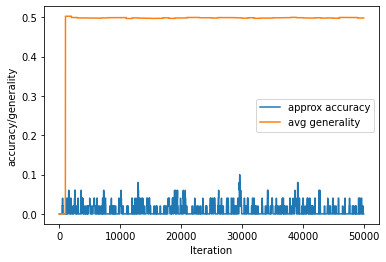

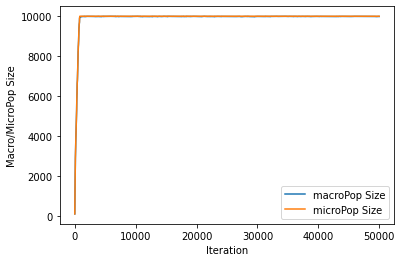

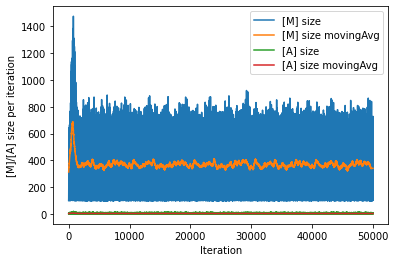

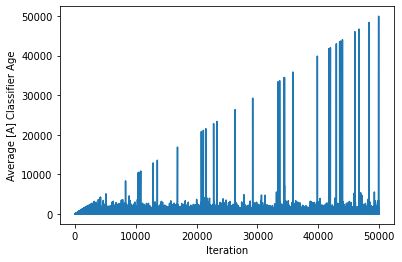

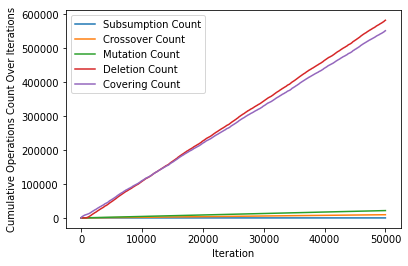

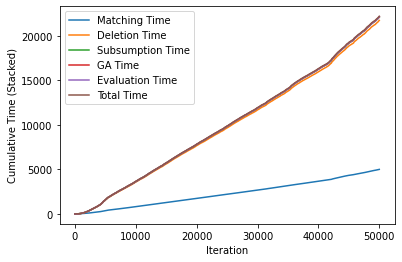

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def cumulativeFreq(freq):
    a = []
    c = []
    for i in freq:
        a.append(i+sum(c))
        c.append(i)
    return np.array(a)

def movingAvg(a,threshold=300):
    weights = np.repeat(1.0,threshold)/threshold
    conv = np.convolve(a,weights,'valid')
    return np.append(conv,np.full(threshold-1,conv[conv.size-1]),)

dataTracking = pd.read_csv("iterationData_cifar100_Vgg19_50_XCS.csv")

iterations = dataTracking["Iteration"].values
accuracy = dataTracking['Accuracy (approx)'].values
generality = dataTracking['Average Population Generality'].values
macroPop = dataTracking["Macropopulation Size"].values
microPop = dataTracking["Micropopulation Size"].values
mSize = dataTracking["Match Set Size"].values
aSize = dataTracking["Action Set Size"].values
experience = dataTracking["Average Iteration Age of Action Set Classifiers"].values
subsumption = dataTracking["# Classifiers Subsumed in Iteration"].values
crossover = dataTracking["# Crossover Operations Performed in Iteration"].values
mutation = dataTracking["# Mutation Operations Performed in Iteration"].values
covering = dataTracking["# Covering Operations Performed in Iteration"].values
deletion = dataTracking["# Deletion Operations Performed in Iteration"].values

gTime = dataTracking["Total Global Time"].values
mTime = dataTracking["Total Matching Time"].values
delTime = dataTracking["Total Deletion Time"].values
subTime = dataTracking["Total Subsumption Time"].values
selTime = dataTracking["Total GA Time"].values
evalTime = dataTracking["Total Evaluation Time"].values

plt.plot(iterations,accuracy,label="approx accuracy")
plt.plot(iterations,generality,label="avg generality")
plt.xlabel('Iteration')
plt.ylabel('accuracy/generality')
plt.legend()
plt.show()

plt.plot(iterations,macroPop,label="macroPop Size")
plt.plot(iterations,microPop,label="microPop Size")
plt.xlabel('Iteration')
plt.ylabel('Macro/MicroPop Size')
plt.legend()
plt.show()

plt.plot(iterations,mSize,label="[M] size")
plt.plot(iterations,movingAvg(mSize),label="[M] size movingAvg")
plt.plot(iterations,aSize,label="[A] size")
plt.plot(iterations,movingAvg(aSize),label="[A] size movingAvg")
plt.xlabel('Iteration')
plt.ylabel('[M]/[A] size per iteration')
plt.legend()
plt.show()

plt.plot(iterations,experience)
plt.ylabel('Average [A] Classifier Age')
plt.xlabel('Iteration')
plt.show()

plt.plot(iterations,cumulativeFreq(subsumption),label="Subsumption Count")
plt.plot(iterations,cumulativeFreq(crossover),label="Crossover Count")
plt.plot(iterations,cumulativeFreq(mutation),label="Mutation Count")
plt.plot(iterations,cumulativeFreq(deletion),label="Deletion Count")
plt.plot(iterations,cumulativeFreq(covering),label="Covering Count")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Operations Count Over Iterations')
plt.legend()
plt.show()

plt.plot(iterations,mTime,label="Matching Time")
plt.plot(iterations,delTime+mTime,label="Deletion Time")
plt.plot(iterations,subTime+delTime+mTime,label="Subsumption Time")
plt.plot(iterations,selTime+subTime+delTime+mTime,label="GA Time")
plt.plot(iterations,evalTime+selTime+subTime+delTime+mTime,label="Evaluation Time")
plt.plot(iterations,gTime,label="Total Time")
plt.xlabel('Iteration')
plt.ylabel('Cumulative Time (Stacked)')
plt.legend()
plt.show()

In [8]:
trainedModel.export_final_rule_population("RulePopulationCifar100Vgg1950_XCS.csv",Features,classLabel)

populationData2 = pd.read_csv("RulePopulationCifar100Vgg1950_XCS.csv")
display(populationData2)

,0,1,2,3,4,5,6,7,8,9,...,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"0.6605272864999998,7.487217845500001",#,#,"-1.316728397245,6.514450831245","-1.67108464275,6.40466523275",#,"-11.200622111,6.560595541",#,"-5.153676256899999,10.9554550509",#,...,0.0,1.0,1,1.0,41037,41037,0.58,0.000086,0,11
1,"0.04627710349999958,6.872967662500001","-6.801680878100001,12.6223452841","-14.022839499989999,3.7040652759899997","-9.863830905405,-0.011702198594999658","-3.29339385125,6.3454043872499994","-3.6007930433750004,3.6072608233750008",#,#,"-5.6300470282,4.4051495242000005","-2.1950159838000003,12.9618349838",...,0.0,1.0,1,1.0,41186,41186,0.56,0.000086,0,1
2,#,"-7.143385767750001,0.2141998997500001",#,#,#,#,#,#,"-8.905253978300001,3.5066996523000005","-11.920213761399998,10.9763057854",...,0.0,1.0,1,1.0,41567,41567,0.56,0.000086,0,3
3,#,"-16.8438693572,-7.426159702799999","-17.285686277105,-6.452577802895",#,"-5.965847612499999,9.143619896499999",#,#,#,#,#,...,0.0,1.0,1,1.0,41609,41609,0.54,0.000086,0,16
4,#,#,#,#,"-4.402257920999999,14.354322434999998",#,"-1.300168095,9.553909359",#,#,"-8.572127094399999,12.711961498400001",...,0.0,1.0,1,1.0,41888,41888,0.48,0.000086,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,"-6.638653063000001,9.115248227",#,"-10.77523119599,6.95167357999","-4.43443345064,3.64936446264",#,#,"-2.5375889777500005,6.09633626975",#,#,#,...,0.0,1.0,1,4.0,49997,49997,0.38,0.000343,0,0
9984,#,"-9.11010511745,10.60822447145",#,#,#,"-6.823981706125,4.315737906125001",#,"-2.5077188730000013,7.276510071000001",#,"-4.654723024,8.244724608",...,0.0,1.0,1,4.0,49997,49997,0.44,0.000343,0,2
9985,#,"-2.9127508997500002,4.444834767750001","-14.1098976151,5.586663247099999",#,"-3.4311542517499993,9.854756833749999","-6.684630594750001,0.7418491467500008","-4.289951859,6.564125595","-2.7231901688000004,10.9747303528",#,#,...,0.0,1.0,1,1.0,49999,49999,0.54,0.000086,0,1
9986,"-8.564647064,2.9882138820000006",#,"-14.406061793029998,-1.9315732469699993",#,#,"-14.177083541250003,1.1127276912500017","-7.589905023749999,10.911363363749999","-3.2977497858000016,14.593411711800002",#,#,...,0.0,1.0,1,3.0,49999,49999,0.50,0.000257,0,0


In [9]:
trainedModel.export_final_rule_population_DCAL("RulePopulationCifar100Vgg19502_XCS.csv",Features,classLabel)

populationData3 = pd.read_csv("RulePopulationCifar100Vgg19502_XCS.csv")
display(populationData3)

,Specified Values,Specified Attribute Names,Class Label,Fitness,Prediction,Prediction Error,Accuracy,Numerosity,Avg Action Set Size,TimeStamp GA,Iteration Initialized,Specificity,Deletion Probability,Experience,Match Count
0,"[0.6605272864999998,7.487217845500001], [-1.31...","0, 3, 4, 6, 8, 14, 15, 19, 21, 22, 23, 26, 27,...",85,0.010000,10.0,0.0,1.0,1,1.0,41037,41037,0.58,0.000086,0,11
1,"[0.04627710349999958,6.872967662500001], [-6.8...","0, 1, 2, 3, 4, 5, 8, 9, 12, 15, 16, 18, 22, 23...",88,0.010000,10.0,0.0,1.0,1,1.0,41186,41186,0.56,0.000086,0,1
2,"[-7.143385767750001,0.2141998997500001], [-8.9...","1, 8, 9, 12, 13, 14, 17, 18, 20, 22, 26, 27, 2...",37,0.010000,10.0,0.0,1.0,1,1.0,41567,41567,0.56,0.000086,0,3
3,"[-16.8438693572,-7.426159702799999], [-17.2856...","1, 2, 4, 10, 16, 17, 18, 23, 24, 25, 26, 28, 2...",18,0.010000,10.0,0.0,1.0,1,1.0,41609,41609,0.54,0.000086,0,16
4,"[-4.402257920999999,14.354322434999998], [-1.3...","4, 6, 9, 10, 12, 13, 14, 17, 23, 25, 27, 28, 2...",97,0.010000,10.0,0.0,1.0,1,1.0,41888,41888,0.48,0.000086,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9983,"[-6.638653063000001,9.115248227], [-10.7752311...","0, 2, 3, 6, 14, 17, 19, 26, 32, 33, 34, 35, 39...",90,0.009973,0.0,0.0,1.0,1,4.0,49997,49997,0.38,0.000343,0,0
9984,"[-9.11010511745,10.60822447145], [-6.823981706...","1, 5, 7, 9, 10, 12, 18, 20, 21, 22, 23, 28, 29...",90,0.009973,0.0,0.0,1.0,1,4.0,49997,49997,0.44,0.000343,0,2
9985,"[-2.9127508997500002,4.444834767750001], [-14....","1, 2, 4, 5, 6, 7, 12, 13, 15, 19, 20, 21, 24, ...",1,0.010000,10.0,0.0,1.0,1,1.0,49999,49999,0.54,0.000086,0,1
9986,"[-8.564647064,2.9882138820000006], [-14.406061...","0, 2, 5, 6, 7, 12, 13, 15, 18, 21, 24, 25, 27,...",16,0.007467,0.0,0.0,1.0,1,3.0,49999,49999,0.50,0.000257,0,0


# ROC and PRC Curves

## 0-49

### ROC and PRC Curves 0-9 

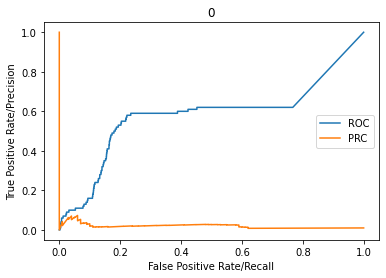

PRC AUC:0.01915002292228158
ROC AUC:0.5782868686868686


In [10]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(X_t)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:,0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:,0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

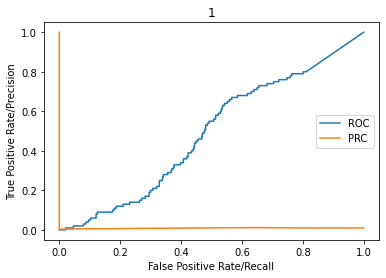

PRC AUC:0.008949382402741743
ROC AUC:0.4865414141414141


In [11]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

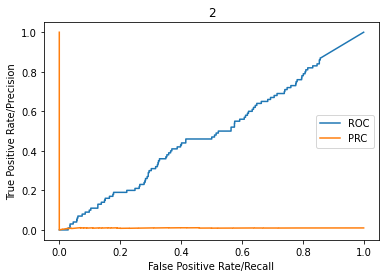

PRC AUC:0.009584235501508316
ROC AUC:0.4888919191919192


In [12]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

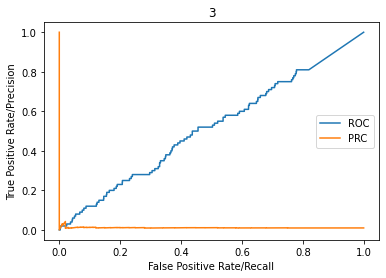

PRC AUC:0.010895062777994725
ROC AUC:0.5142833333333333


In [13]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

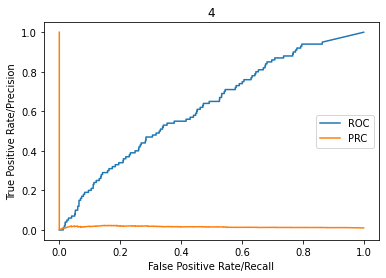

PRC AUC:0.014956298369003699
ROC AUC:0.6205262626262625


In [14]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

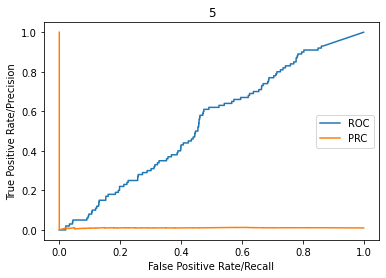

PRC AUC:0.01046335030915533
ROC AUC:0.5398510101010101


In [15]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

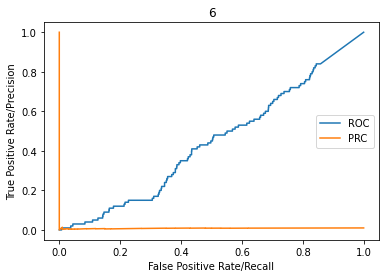

PRC AUC:0.008274912953674012
ROC AUC:0.4423237373737374


In [16]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

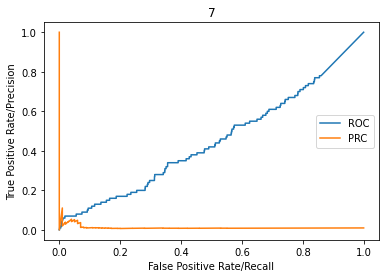

PRC AUC:0.011353110172509374
ROC AUC:0.44919949494949496


In [17]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

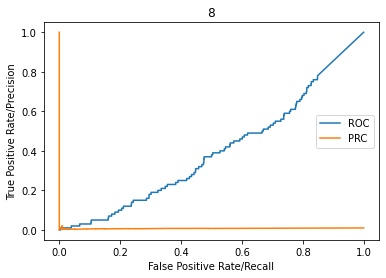

PRC AUC:0.007594713502856066
ROC AUC:0.3951979797979799


In [18]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

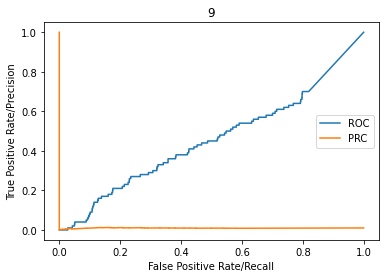

PRC AUC:0.009143944431020207
ROC AUC:0.45584040404040405


In [19]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))

### ROC and PRC Curve 10-19

fpr11, tpr11, thresholds11 = roc_curve(Y_test[:,10], probs[:,10])
prec11, recall11, thresholds11 = precision_recall_curve(Y_test[:,10], probs[:,10])

plt.plot(fpr11,tpr11,label="ROC")
plt.plot(recall11,prec11,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('10')
plt.show()

print("PRC AUC:" + str(auc(recall11, prec11)))
print("ROC AUC:" + str(auc(fpr11, tpr11)))

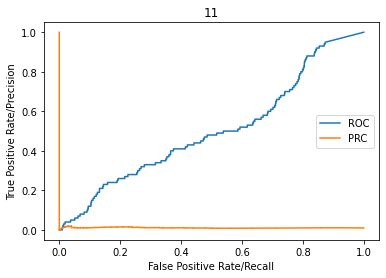

PRC AUC:0.010761471269549726
ROC AUC:0.5018934343434343


In [20]:
fpr12, tpr12, thresholds12 = roc_curve(Y_test[:,11], probs[:, 11])
prec12, recall12, thresholds12 = precision_recall_curve(Y_test[:,11], probs[:, 11])

plt.plot(fpr12,tpr12,label="ROC")
plt.plot(recall12,prec12,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('11')
plt.show()

print("PRC AUC:" + str(auc(recall12, prec12)))
print("ROC AUC:" + str(auc(fpr12, tpr12)))

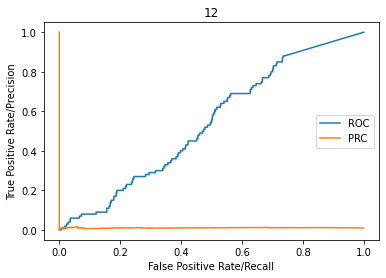

PRC AUC:0.01048337639713968
ROC AUC:0.5388707070707071


In [21]:
fpr13, tpr13, thresholds13 = roc_curve(Y_test[:,12], probs[:, 12])
prec13, recall13, thresholds13 = precision_recall_curve(Y_test[:,12], probs[:, 12])

plt.plot(fpr13,tpr13,label="ROC")
plt.plot(recall13,prec13,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('12')
plt.show()

print("PRC AUC:" + str(auc(recall13, prec13)))
print("ROC AUC:" + str(auc(fpr13, tpr13)))

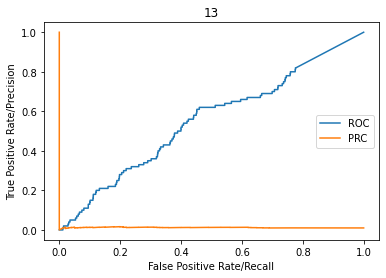

PRC AUC:0.011799189411141714
ROC AUC:0.5524040404040403


In [22]:
fpr14, tpr14, thresholds14 = roc_curve(Y_test[:,13], probs[:, 13])
prec14, recall14, thresholds14 = precision_recall_curve(Y_test[:,13], probs[:, 13])

plt.plot(fpr14,tpr14,label="ROC")
plt.plot(recall14,prec14,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('13')
plt.show()

print("PRC AUC:" + str(auc(recall14, prec14)))
print("ROC AUC:" + str(auc(fpr14, tpr14)))

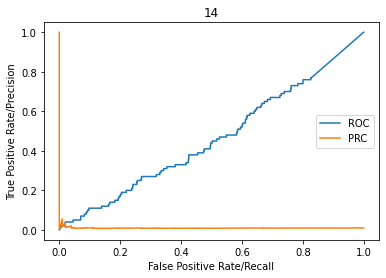

PRC AUC:0.009634923851578967
ROC AUC:0.4614853535353536


In [23]:
fpr15, tpr15, thresholds15 = roc_curve(Y_test[:,14], probs[:, 14])
prec15, recall15, thresholds15 = precision_recall_curve(Y_test[:,14], probs[:, 14])

plt.plot(fpr15,tpr15,label="ROC")
plt.plot(recall15,prec15,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('14')
plt.show()

print("PRC AUC:" + str(auc(recall15, prec15)))
print("ROC AUC:" + str(auc(fpr15, tpr15)))

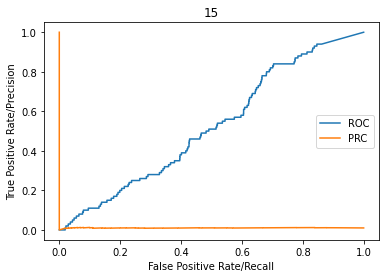

PRC AUC:0.01017980224135875
ROC AUC:0.5229777777777778


In [24]:
fpr16, tpr16, thresholds16 = roc_curve(Y_test[:,15], probs[:, 15])
prec16, recall16, thresholds16 = precision_recall_curve(Y_test[:,15], probs[:, 15])

plt.plot(fpr16,tpr16,label="ROC")
plt.plot(recall16,prec16,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('15')
plt.show()

print("PRC AUC:" + str(auc(recall16, prec16)))
print("ROC AUC:" + str(auc(fpr16, tpr16)))

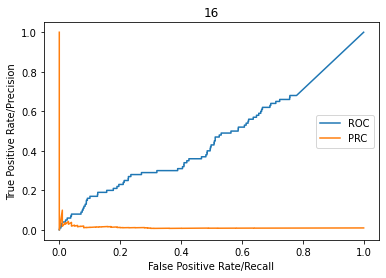

PRC AUC:0.011361366036739963
ROC AUC:0.46503383838383844


In [25]:
fpr17, tpr17, thresholds17 = roc_curve(Y_test[:,16], probs[:, 16])
prec17, recall17, thresholds17 = precision_recall_curve(Y_test[:,16], probs[:, 16])

plt.plot(fpr17,tpr17,label="ROC")
plt.plot(recall17,prec17,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('16')
plt.show()

print("PRC AUC:" + str(auc(recall17, prec17)))
print("ROC AUC:" + str(auc(fpr17, tpr17)))

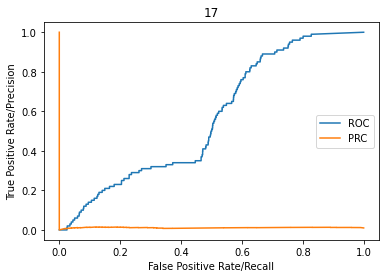

PRC AUC:0.011321144992742895
ROC AUC:0.5635722222222221


In [26]:
fpr18, tpr18, thresholds18 = roc_curve(Y_test[:,17], probs[:, 17])
prec18, recall18, thresholds18 = precision_recall_curve(Y_test[:,17], probs[:, 17])

plt.plot(fpr18,tpr18,label="ROC")
plt.plot(recall18,prec18,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('17')
plt.show()

print("PRC AUC:" + str(auc(recall18, prec18)))
print("ROC AUC:" + str(auc(fpr18, tpr18)))

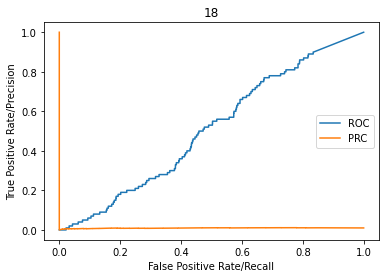

PRC AUC:0.009453848742134459
ROC AUC:0.5083868686868687


In [27]:
fpr19, tpr19, thresholds19 = roc_curve(Y_test[:,18], probs[:, 18])
prec19, recall19, thresholds19 = precision_recall_curve(Y_test[:,18], probs[:, 18])

plt.plot(fpr19,tpr19,label="ROC")
plt.plot(recall19,prec19,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('18')
plt.show()

print("PRC AUC:" + str(auc(recall19, prec19)))
print("ROC AUC:" + str(auc(fpr19, tpr19)))

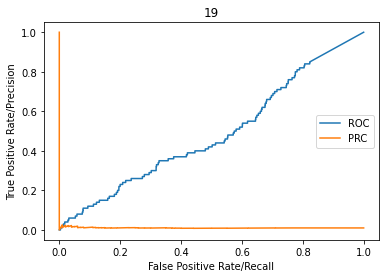

PRC AUC:0.010313337321699503
ROC AUC:0.48556919191919196


In [28]:
fpr20, tpr20, thresholds20 = roc_curve(Y_test[:,19], probs[:, 19])
prec20, recall20, thresholds20 = precision_recall_curve(Y_test[:,19], probs[:, 19])

plt.plot(fpr20,tpr20,label="ROC")
plt.plot(recall20,prec20,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('19')
plt.show()

print("PRC AUC:" + str(auc(recall20, prec20)))
print("ROC AUC:" + str(auc(fpr20, tpr20)))

### ROC and PRC Curve 20-29

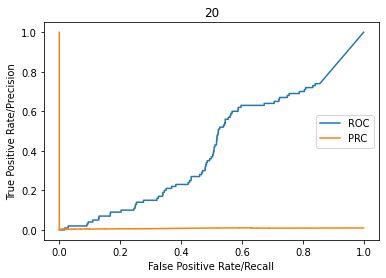

PRC AUC:0.007839661285476715
ROC AUC:0.4183444444444445


In [29]:
fpr21, tpr21, thresholds21 = roc_curve(Y_test[:,20], probs[:,20])
prec21, recall21, thresholds21 = precision_recall_curve(Y_test[:,20], probs[:,20])

plt.plot(fpr21,tpr21,label="ROC")
plt.plot(recall21,prec21,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('20')
plt.show()

print("PRC AUC:" + str(auc(recall21, prec21)))
print("ROC AUC:" + str(auc(fpr21, tpr21)))

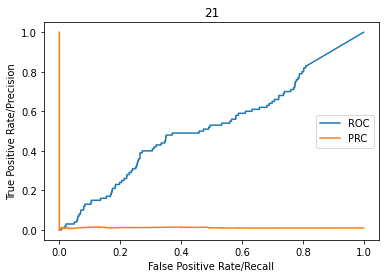

PRC AUC:0.010979361979226998
ROC AUC:0.5202924242424243


In [30]:
fpr22, tpr22, thresholds22 = roc_curve(Y_test[:,21], probs[:, 21])
prec22, recall22, thresholds22 = precision_recall_curve(Y_test[:,21], probs[:, 21])

plt.plot(fpr22,tpr22,label="ROC")
plt.plot(recall22,prec22,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('21')
plt.show()

print("PRC AUC:" + str(auc(recall22, prec22)))
print("ROC AUC:" + str(auc(fpr22, tpr22)))

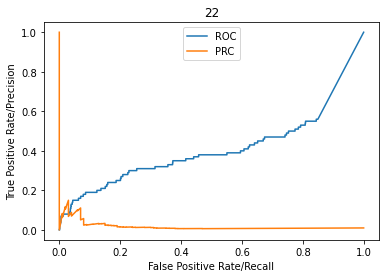

PRC AUC:0.016742650658842957
ROC AUC:0.4104686868686868


In [31]:
fpr23, tpr23, thresholds23 = roc_curve(Y_test[:,22], probs[:, 22])
prec23, recall23, thresholds23 = precision_recall_curve(Y_test[:,22], probs[:, 22])

plt.plot(fpr23,tpr23,label="ROC")
plt.plot(recall23,prec23,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('22')
plt.show()

print("PRC AUC:" + str(auc(recall23, prec23)))
print("ROC AUC:" + str(auc(fpr23, tpr23)))

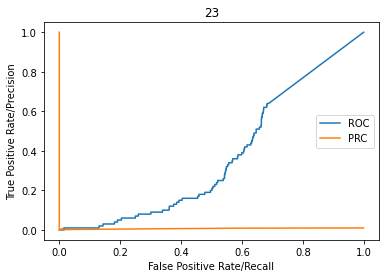

PRC AUC:0.007082542976156115
ROC AUC:0.36816666666666664


In [32]:
fpr24, tpr24, thresholds24 = roc_curve(Y_test[:,23], probs[:, 23])
prec24, recall24, thresholds24 = precision_recall_curve(Y_test[:,23], probs[:, 23])

plt.plot(fpr24,tpr24,label="ROC")
plt.plot(recall24,prec24,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('23')
plt.show()

print("PRC AUC:" + str(auc(recall24, prec24)))
print("ROC AUC:" + str(auc(fpr24, tpr24)))

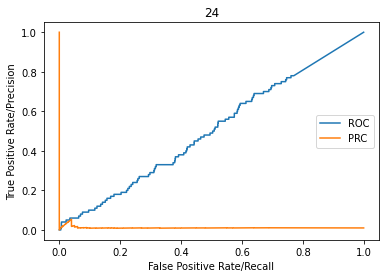

PRC AUC:0.010869371599594061
ROC AUC:0.5031878787878787


In [33]:
fpr25, tpr25, thresholds25 = roc_curve(Y_test[:,24], probs[:, 24])
prec25, recall25, thresholds25 = precision_recall_curve(Y_test[:,24], probs[:, 24])

plt.plot(fpr25,tpr25,label="ROC")
plt.plot(recall25,prec25,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('24')
plt.show()

print("PRC AUC:" + str(auc(recall25, prec25)))
print("ROC AUC:" + str(auc(fpr25, tpr25)))

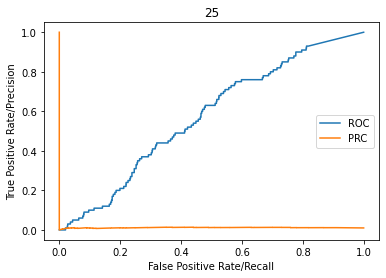

PRC AUC:0.011363208090245732
ROC AUC:0.5737722222222221


In [34]:
fpr26, tpr26, thresholds26 = roc_curve(Y_test[:,25], probs[:, 25])
prec26, recall26, thresholds26 = precision_recall_curve(Y_test[:,25], probs[:, 25])

plt.plot(fpr26,tpr26,label="ROC")
plt.plot(recall26,prec26,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('25')
plt.show()

print("PRC AUC:" + str(auc(recall26, prec26)))
print("ROC AUC:" + str(auc(fpr26, tpr26)))

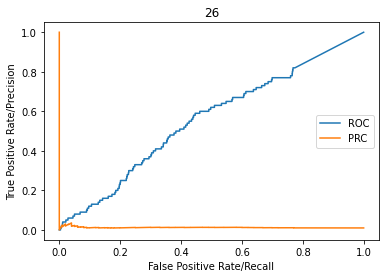

PRC AUC:0.012214986325963682
ROC AUC:0.5553656565656565


In [35]:
fpr27, tpr27, thresholds27 = roc_curve(Y_test[:,26], probs[:, 26])
prec27, recall27, thresholds27 = precision_recall_curve(Y_test[:,26], probs[:, 26])

plt.plot(fpr27,tpr27,label="ROC")
plt.plot(recall27,prec27,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('26')
plt.show()

print("PRC AUC:" + str(auc(recall27, prec27)))
print("ROC AUC:" + str(auc(fpr27, tpr27)))

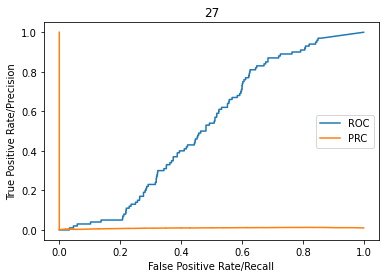

PRC AUC:0.009511241116871736
ROC AUC:0.5262464646464646


In [36]:
fpr28, tpr28, thresholds28 = roc_curve(Y_test[:,27], probs[:, 27])
prec28, recall28, thresholds28 = precision_recall_curve(Y_test[:,27], probs[:, 27])

plt.plot(fpr28,tpr28,label="ROC")
plt.plot(recall28,prec28,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('27')
plt.show()

print("PRC AUC:" + str(auc(recall28, prec28)))
print("ROC AUC:" + str(auc(fpr28, tpr28)))

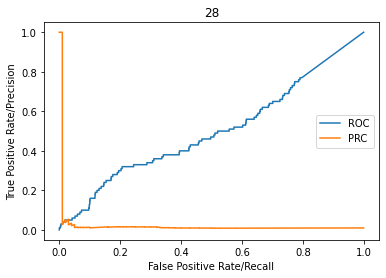

PRC AUC:0.021844036743796133
ROC AUC:0.49916969696969704


In [37]:
fpr29, tpr29, thresholds29 = roc_curve(Y_test[:,28], probs[:, 28])
prec29, recall29, thresholds29 = precision_recall_curve(Y_test[:,28], probs[:, 28])

plt.plot(fpr29,tpr29,label="ROC")
plt.plot(recall29,prec29,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('28')
plt.show()

print("PRC AUC:" + str(auc(recall29, prec29)))
print("ROC AUC:" + str(auc(fpr29, tpr29)))

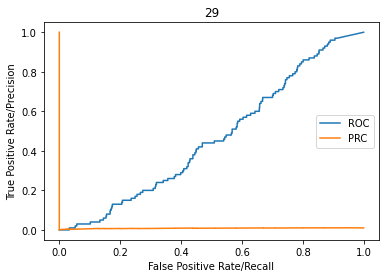

PRC AUC:0.008468420404906744
ROC AUC:0.4636136363636364


In [38]:
fpr30, tpr30, thresholds30 = roc_curve(Y_test[:,29], probs[:, 29])
prec30, recall30, thresholds30 = precision_recall_curve(Y_test[:,29], probs[:, 29])

plt.plot(fpr30,tpr30,label="ROC")
plt.plot(recall30,prec30,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('29')
plt.show()

print("PRC AUC:" + str(auc(recall30, prec30)))
print("ROC AUC:" + str(auc(fpr30, tpr30)))

### ROC and PRC Curve 30-39

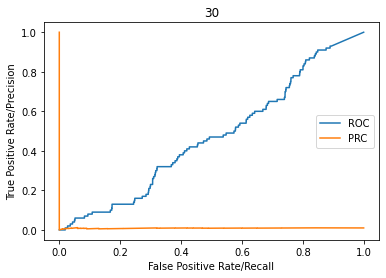

PRC AUC:0.008903446008868127
ROC AUC:0.47023737373737373


In [39]:
fpr31, tpr31, thresholds31 = roc_curve(Y_test[:,30], probs[:,30])
prec31, recall31, thresholds31 = precision_recall_curve(Y_test[:,30], probs[:,30])

plt.plot(fpr31,tpr31,label="ROC")
plt.plot(recall31,prec31,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('30')
plt.show()

print("PRC AUC:" + str(auc(recall31, prec31)))
print("ROC AUC:" + str(auc(fpr31, tpr31)))

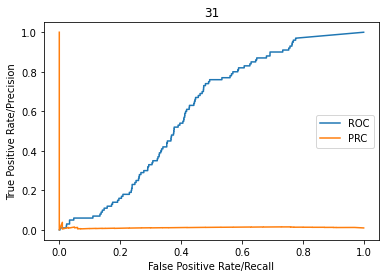

PRC AUC:0.011888889557437474
ROC AUC:0.6017858585858585


In [40]:
fpr32, tpr32, thresholds32 = roc_curve(Y_test[:,31], probs[:, 31])
prec32, recall32, thresholds32 = precision_recall_curve(Y_test[:,31], probs[:, 31])

plt.plot(fpr32,tpr32,label="ROC")
plt.plot(recall32,prec32,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('31')
plt.show()

print("PRC AUC:" + str(auc(recall32, prec32)))
print("ROC AUC:" + str(auc(fpr32, tpr32)))

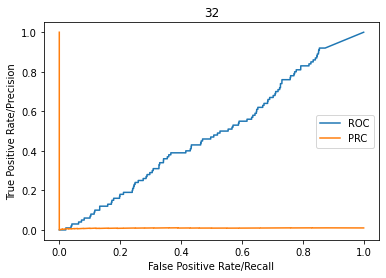

PRC AUC:0.009258650392792358
ROC AUC:0.4880363636363636


In [41]:
fpr33, tpr33, thresholds33 = roc_curve(Y_test[:,32], probs[:, 32])
prec33, recall33, thresholds33 = precision_recall_curve(Y_test[:,32], probs[:, 32])

plt.plot(fpr33,tpr33,label="ROC")
plt.plot(recall33,prec33,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('32')
plt.show()

print("PRC AUC:" + str(auc(recall33, prec33)))
print("ROC AUC:" + str(auc(fpr33, tpr33)))

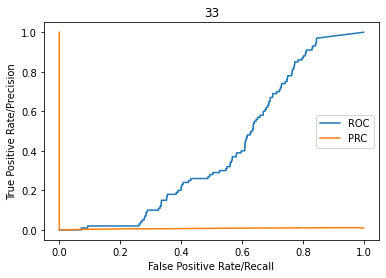

PRC AUC:0.007516666872601513
ROC AUC:0.4049166666666667


In [42]:
fpr34, tpr34, thresholds34 = roc_curve(Y_test[:,33], probs[:, 33])
prec34, recall34, thresholds34 = precision_recall_curve(Y_test[:,33], probs[:, 33])

plt.plot(fpr34,tpr34,label="ROC")
plt.plot(recall34,prec34,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('33')
plt.show()

print("PRC AUC:" + str(auc(recall34, prec34)))
print("ROC AUC:" + str(auc(fpr34, tpr34)))

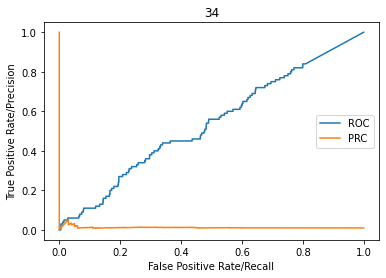

PRC AUC:0.012047205197992848
ROC AUC:0.5369555555555555


In [43]:
fpr35, tpr35, thresholds35 = roc_curve(Y_test[:,34], probs[:, 34])
prec35, recall35, thresholds35 = precision_recall_curve(Y_test[:,34], probs[:, 34])

plt.plot(fpr35,tpr35,label="ROC")
plt.plot(recall35,prec35,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('34')
plt.show()

print("PRC AUC:" + str(auc(recall35, prec35)))
print("ROC AUC:" + str(auc(fpr35, tpr35)))

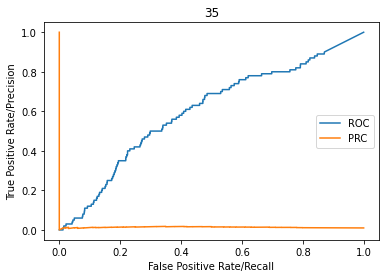

PRC AUC:0.013266501723562411
ROC AUC:0.6007287878787879


In [44]:
fpr36, tpr36, thresholds36 = roc_curve(Y_test[:,35], probs[:, 35])
prec36, recall36, thresholds36 = precision_recall_curve(Y_test[:,35], probs[:, 35])

plt.plot(fpr36,tpr36,label="ROC")
plt.plot(recall36,prec36,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('35')
plt.show()

print("PRC AUC:" + str(auc(recall36, prec36)))
print("ROC AUC:" + str(auc(fpr36, tpr36)))

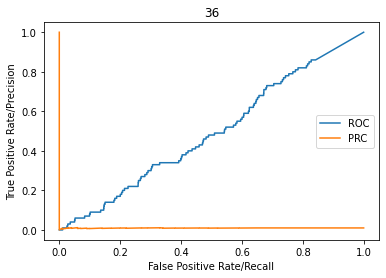

PRC AUC:0.009520137898245126
ROC AUC:0.4929131313131313


In [45]:
fpr37, tpr37, thresholds37 = roc_curve(Y_test[:,36], probs[:, 36])
prec37, recall37, thresholds37 = precision_recall_curve(Y_test[:,36], probs[:, 36])

plt.plot(fpr37,tpr37,label="ROC")
plt.plot(recall37,prec37,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('36')
plt.show()

print("PRC AUC:" + str(auc(recall37, prec37)))
print("ROC AUC:" + str(auc(fpr37, tpr37)))

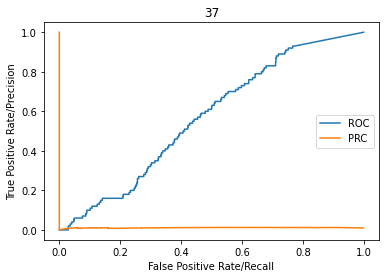

PRC AUC:0.011028268094390196
ROC AUC:0.5687909090909091


In [46]:
fpr38, tpr38, thresholds38 = roc_curve(Y_test[:,37], probs[:, 37])
prec38, recall38, thresholds38 = precision_recall_curve(Y_test[:,37], probs[:, 37])

plt.plot(fpr38,tpr38,label="ROC")
plt.plot(recall38,prec38,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('37')
plt.show()

print("PRC AUC:" + str(auc(recall38, prec38)))
print("ROC AUC:" + str(auc(fpr38, tpr38)))

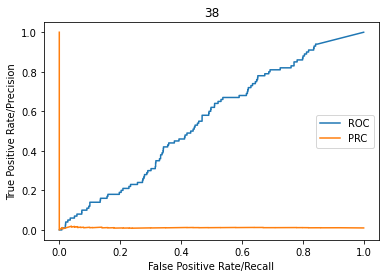

PRC AUC:0.011273454339184568
ROC AUC:0.5540747474747474


In [47]:
fpr39, tpr39, thresholds39 = roc_curve(Y_test[:,38], probs[:, 38])
prec39, recall39, thresholds39 = precision_recall_curve(Y_test[:,38], probs[:, 38])

plt.plot(fpr39,tpr39,label="ROC")
plt.plot(recall39,prec39,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('38')
plt.show()

print("PRC AUC:" + str(auc(recall39, prec39)))
print("ROC AUC:" + str(auc(fpr39, tpr39)))

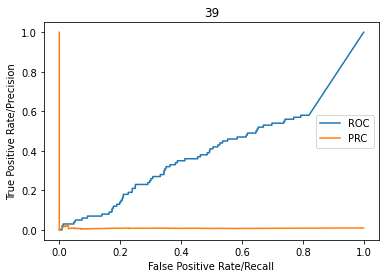

PRC AUC:0.008317161429087524
ROC AUC:0.4055702020202021


In [48]:
fpr40, tpr40, thresholds40 = roc_curve(Y_test[:,39], probs[:, 39])
prec40, recall40, thresholds40 = precision_recall_curve(Y_test[:,39], probs[:, 39])

plt.plot(fpr40,tpr40,label="ROC")
plt.plot(recall40,prec40,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('39')
plt.show()

print("PRC AUC:" + str(auc(recall40, prec40)))
print("ROC AUC:" + str(auc(fpr40, tpr40)))

### ROC and PRC Curve 40-49

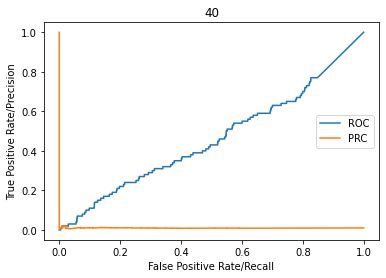

PRC AUC:0.0094822292698535
ROC AUC:0.4592136363636363


In [49]:
fpr41, tpr41, thresholds41 = roc_curve(Y_test[:,40], probs[:,40])
prec41, recall41, thresholds41 = precision_recall_curve(Y_test[:,40], probs[:,40])

plt.plot(fpr41,tpr41,label="ROC")
plt.plot(recall41,prec41,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('40')
plt.show()

print("PRC AUC:" + str(auc(recall41, prec41)))
print("ROC AUC:" + str(auc(fpr41, tpr41)))

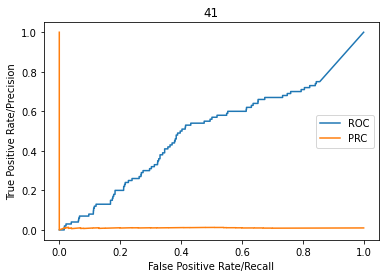

PRC AUC:0.01000732913820779
ROC AUC:0.4964666666666666


In [50]:
fpr42, tpr42, thresholds42 = roc_curve(Y_test[:,41], probs[:, 41])
prec42, recall42, thresholds42 = precision_recall_curve(Y_test[:,41], probs[:, 41])

plt.plot(fpr42,tpr42,label="ROC")
plt.plot(recall42,prec42,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('41')
plt.show()

print("PRC AUC:" + str(auc(recall42, prec42)))
print("ROC AUC:" + str(auc(fpr42, tpr42)))

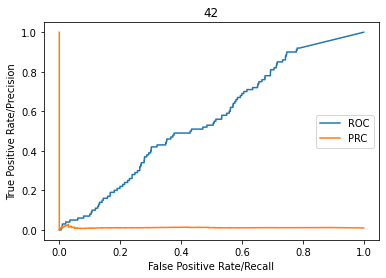

PRC AUC:0.011436283653737807
ROC AUC:0.5594101010101009


In [51]:
fpr43, tpr43, thresholds43 = roc_curve(Y_test[:,42], probs[:, 42])
prec43, recall43, thresholds43 = precision_recall_curve(Y_test[:,42], probs[:, 42])

plt.plot(fpr43,tpr43,label="ROC")
plt.plot(recall43,prec43,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('42')
plt.show()

print("PRC AUC:" + str(auc(recall43, prec43)))
print("ROC AUC:" + str(auc(fpr43, tpr43)))

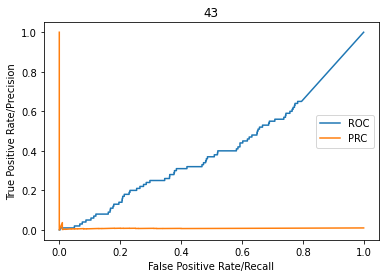

PRC AUC:0.00800388462509283
ROC AUC:0.4061075757575758


In [52]:
fpr44, tpr44, thresholds44 = roc_curve(Y_test[:,43], probs[:, 43])
prec44, recall44, thresholds44 = precision_recall_curve(Y_test[:,43], probs[:, 43])

plt.plot(fpr44,tpr44,label="ROC")
plt.plot(recall44,prec44,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('43')
plt.show()

print("PRC AUC:" + str(auc(recall44, prec44)))
print("ROC AUC:" + str(auc(fpr44, tpr44)))

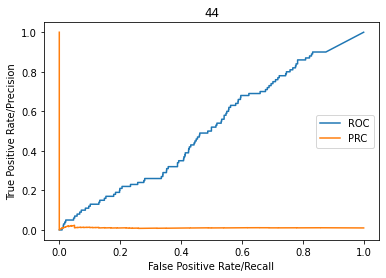

PRC AUC:0.010538145653186374
ROC AUC:0.5137181818181819


In [53]:
fpr45, tpr45, thresholds45 = roc_curve(Y_test[:,44], probs[:, 44])
prec45, recall45, thresholds45 = precision_recall_curve(Y_test[:,44], probs[:, 44])

plt.plot(fpr45,tpr45,label="ROC")
plt.plot(recall45,prec45,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('44')
plt.show()

print("PRC AUC:" + str(auc(recall45, prec45)))
print("ROC AUC:" + str(auc(fpr45, tpr45)))

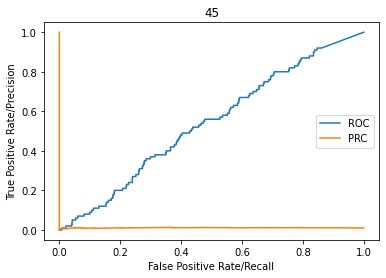

PRC AUC:0.010597171428233288
ROC AUC:0.5390020202020203


In [54]:
fpr46, tpr46, thresholds46 = roc_curve(Y_test[:,45], probs[:, 45])
prec46, recall46, thresholds46 = precision_recall_curve(Y_test[:,45], probs[:, 45])

plt.plot(fpr46,tpr46,label="ROC")
plt.plot(recall46,prec46,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('45')
plt.show()

print("PRC AUC:" + str(auc(recall46, prec46)))
print("ROC AUC:" + str(auc(fpr46, tpr46)))

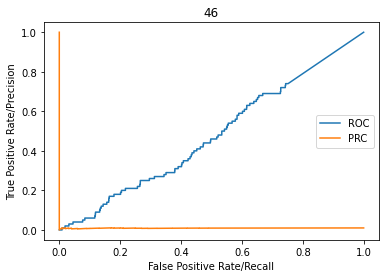

PRC AUC:0.009134108433569783
ROC AUC:0.4766737373737374


In [55]:
fpr47, tpr47, thresholds47 = roc_curve(Y_test[:,46], probs[:, 46])
prec47, recall47, thresholds47 = precision_recall_curve(Y_test[:,46], probs[:, 46])

plt.plot(fpr47,tpr47,label="ROC")
plt.plot(recall47,prec47,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('46')
plt.show()

print("PRC AUC:" + str(auc(recall47, prec47)))
print("ROC AUC:" + str(auc(fpr47, tpr47)))

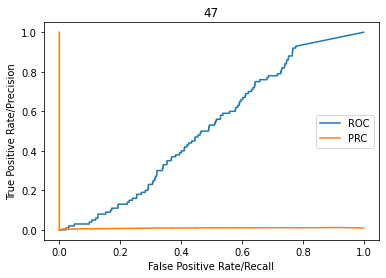

PRC AUC:0.009446138778229194
ROC AUC:0.517610101010101


In [56]:
fpr48, tpr48, thresholds48 = roc_curve(Y_test[:,47], probs[:, 47])
prec48, recall48, thresholds48 = precision_recall_curve(Y_test[:,47], probs[:, 47])

plt.plot(fpr48,tpr48,label="ROC")
plt.plot(recall48,prec48,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('47')
plt.show()

print("PRC AUC:" + str(auc(recall48, prec48)))
print("ROC AUC:" + str(auc(fpr48, tpr48)))

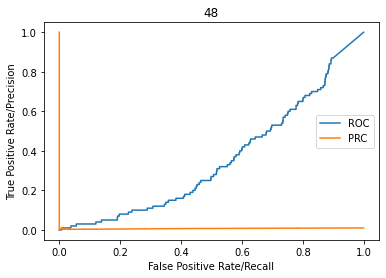

PRC AUC:0.007021757084550454
ROC AUC:0.3558727272727273


In [57]:
fpr49, tpr49, thresholds49 = roc_curve(Y_test[:,48], probs[:, 48])
prec49, recall49, thresholds49 = precision_recall_curve(Y_test[:,48], probs[:, 48])

plt.plot(fpr49,tpr49,label="ROC")
plt.plot(recall49,prec49,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('48')
plt.show()

print("PRC AUC:" + str(auc(recall49, prec49)))
print("ROC AUC:" + str(auc(fpr49, tpr49)))

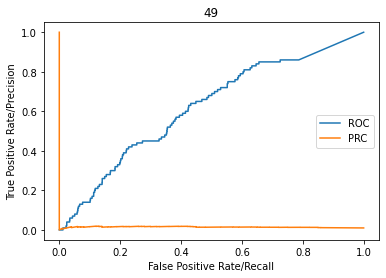

PRC AUC:0.014299450031171657
ROC AUC:0.6187535353535354


In [58]:
fpr50, tpr50, thresholds50 = roc_curve(Y_test[:,49], probs[:, 49])
prec50, recall50, thresholds50 = precision_recall_curve(Y_test[:,49], probs[:, 49])

plt.plot(fpr50,tpr50,label="ROC")
plt.plot(recall50,prec50,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('49')
plt.show()

print("PRC AUC:" + str(auc(recall50, prec50)))
print("ROC AUC:" + str(auc(fpr50, tpr50)))

## 50-99

### ROC and PRC Curves 50-59 

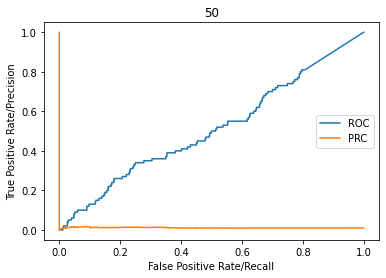

PRC AUC:0.010888343080999353
ROC AUC:0.5091535353535354


In [59]:
fpr51, tpr51, thresholds51 = roc_curve(Y_test[:,50], probs[:,50])
prec51, recall51, thresholds51 = precision_recall_curve(Y_test[:,50], probs[:,50])

plt.plot(fpr51,tpr51,label="ROC")
plt.plot(recall51,prec51,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('50')
plt.show()

print("PRC AUC:" + str(auc(recall51, prec51)))
print("ROC AUC:" + str(auc(fpr51, tpr51)))

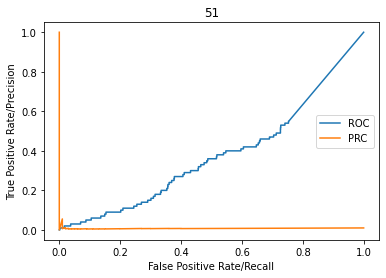

PRC AUC:0.007615040399591296
ROC AUC:0.37639292929292933


In [60]:
fpr52, tpr52, thresholds52 = roc_curve(Y_test[:,51], probs[:, 51])
prec52, recall52, thresholds52 = precision_recall_curve(Y_test[:,51], probs[:, 51])

plt.plot(fpr52,tpr52,label="ROC")
plt.plot(recall52,prec52,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('51')
plt.show()

print("PRC AUC:" + str(auc(recall52, prec52)))
print("ROC AUC:" + str(auc(fpr52, tpr52)))

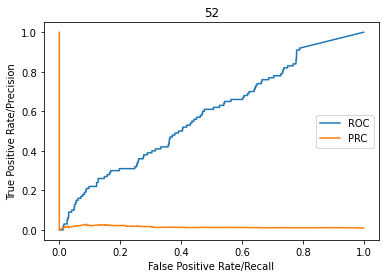

PRC AUC:0.014315727764713447
ROC AUC:0.5840616161616161


In [61]:
fpr53, tpr53, thresholds53 = roc_curve(Y_test[:,52], probs[:, 52])
prec53, recall53, thresholds53 = precision_recall_curve(Y_test[:,52], probs[:, 52])

plt.plot(fpr53,tpr53,label="ROC")
plt.plot(recall53,prec53,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('52')
plt.show()

print("PRC AUC:" + str(auc(recall53, prec53)))
print("ROC AUC:" + str(auc(fpr53, tpr53)))

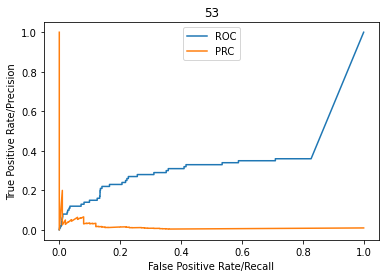

PRC AUC:0.013099718061710616
ROC AUC:0.35188282828282824


In [62]:
fpr54, tpr54, thresholds54 = roc_curve(Y_test[:,53], probs[:, 53])
prec54, recall54, thresholds54 = precision_recall_curve(Y_test[:,53], probs[:, 53])

plt.plot(fpr54,tpr54,label="ROC")
plt.plot(recall54,prec54,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('53')
plt.show()

print("PRC AUC:" + str(auc(recall54, prec54)))
print("ROC AUC:" + str(auc(fpr54, tpr54)))

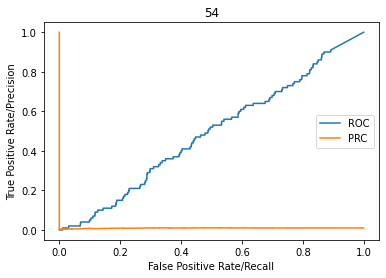

PRC AUC:0.009190781613036218
ROC AUC:0.48723888888888883


In [63]:
fpr55, tpr55, thresholds55 = roc_curve(Y_test[:,54], probs[:, 54])
prec55, recall55, thresholds55 = precision_recall_curve(Y_test[:,54], probs[:, 54])

plt.plot(fpr55,tpr55,label="ROC")
plt.plot(recall55,prec55,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('54')
plt.show()

print("PRC AUC:" + str(auc(recall55, prec55)))
print("ROC AUC:" + str(auc(fpr55, tpr55)))

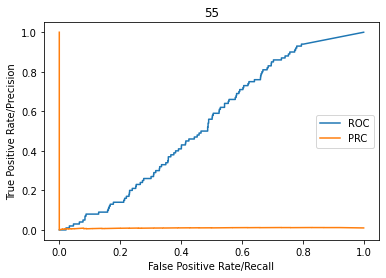

PRC AUC:0.010025250009076107
ROC AUC:0.5404661616161617


In [64]:
fpr56, tpr56, thresholds56 = roc_curve(Y_test[:,55], probs[:, 55])
prec56, recall56, thresholds56 = precision_recall_curve(Y_test[:,55], probs[:, 55])

plt.plot(fpr56,tpr56,label="ROC")
plt.plot(recall56,prec56,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('55')
plt.show()

print("PRC AUC:" + str(auc(recall56, prec56)))
print("ROC AUC:" + str(auc(fpr56, tpr56)))

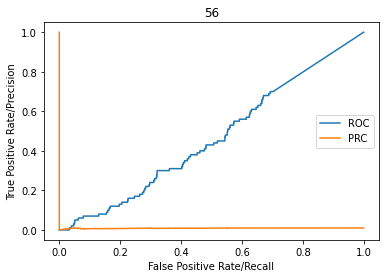

PRC AUC:0.00870158758193032
ROC AUC:0.4641181818181819


In [65]:
fpr57, tpr57, thresholds57 = roc_curve(Y_test[:,56], probs[:, 56])
prec57, recall57, thresholds57 = precision_recall_curve(Y_test[:,56], probs[:, 56])

plt.plot(fpr57,tpr57,label="ROC")
plt.plot(recall57,prec57,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('56')
plt.show()

print("PRC AUC:" + str(auc(recall57, prec57)))
print("ROC AUC:" + str(auc(fpr57, tpr57)))

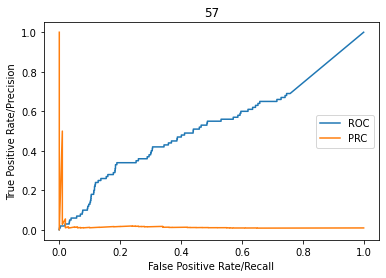

PRC AUC:0.014678728323778544
ROC AUC:0.5239510101010101


In [66]:
fpr58, tpr58, thresholds58 = roc_curve(Y_test[:,57], probs[:, 57])
prec58, recall58, thresholds58 = precision_recall_curve(Y_test[:,57], probs[:, 57])

plt.plot(fpr58,tpr58,label="ROC")
plt.plot(recall58,prec58,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('57')
plt.show()

print("PRC AUC:" + str(auc(recall58, prec58)))
print("ROC AUC:" + str(auc(fpr58, tpr58)))

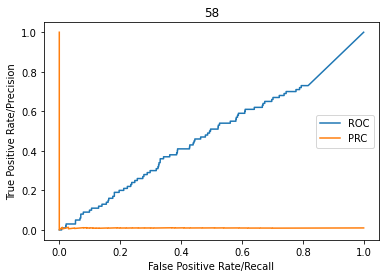

PRC AUC:0.00958455255350235
ROC AUC:0.4803464646464647


In [67]:
fpr59, tpr59, thresholds59 = roc_curve(Y_test[:,58], probs[:, 58])
prec59, recall59, thresholds59 = precision_recall_curve(Y_test[:,58], probs[:, 58])

plt.plot(fpr59,tpr59,label="ROC")
plt.plot(recall59,prec59,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('58')
plt.show()

print("PRC AUC:" + str(auc(recall59, prec59)))
print("ROC AUC:" + str(auc(fpr59, tpr59)))

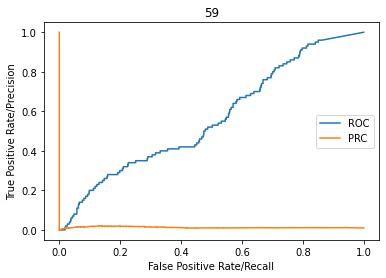

PRC AUC:0.012605209003087203
ROC AUC:0.5614141414141414


In [68]:
fpr60, tpr60, thresholds60 = roc_curve(Y_test[:,59], probs[:, 59])
prec60, recall60, thresholds60 = precision_recall_curve(Y_test[:,59], probs[:, 59])

plt.plot(fpr60,tpr60,label="ROC")
plt.plot(recall60,prec60,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('59')
plt.show()

print("PRC AUC:" + str(auc(recall60, prec60)))
print("ROC AUC:" + str(auc(fpr60, tpr60)))

### ROC and PRC Curve 60-69

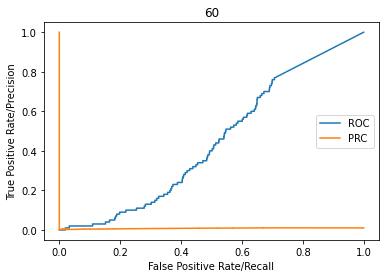

PRC AUC:0.008112282670554936
ROC AUC:0.44542828282828284


In [69]:
fpr61, tpr61, thresholds61 = roc_curve(Y_test[:,60], probs[:,60])
prec61, recall61, thresholds61 = precision_recall_curve(Y_test[:,60], probs[:,60])

plt.plot(fpr61,tpr61,label="ROC")
plt.plot(recall61,prec61,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('60')
plt.show()

print("PRC AUC:" + str(auc(recall61, prec61)))
print("ROC AUC:" + str(auc(fpr61, tpr61)))

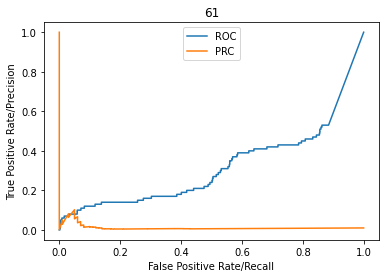

PRC AUC:0.010999346567005137
ROC AUC:0.3199909090909091


In [70]:
fpr62, tpr62, thresholds62 = roc_curve(Y_test[:,61], probs[:, 61])
prec62, recall62, thresholds62 = precision_recall_curve(Y_test[:,61], probs[:, 61])

plt.plot(fpr62,tpr62,label="ROC")
plt.plot(recall62,prec62,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('61')
plt.show()

print("PRC AUC:" + str(auc(recall62, prec62)))
print("ROC AUC:" + str(auc(fpr62, tpr62)))

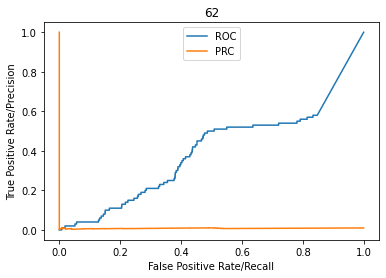

PRC AUC:0.00790048179815945
ROC AUC:0.4001459595959596


In [71]:
fpr63, tpr63, thresholds63 = roc_curve(Y_test[:,62], probs[:, 62])
prec63, recall63, thresholds63 = precision_recall_curve(Y_test[:,62], probs[:, 62])

plt.plot(fpr63,tpr63,label="ROC")
plt.plot(recall63,prec63,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('62')
plt.show()

print("PRC AUC:" + str(auc(recall63, prec63)))
print("ROC AUC:" + str(auc(fpr63, tpr63)))

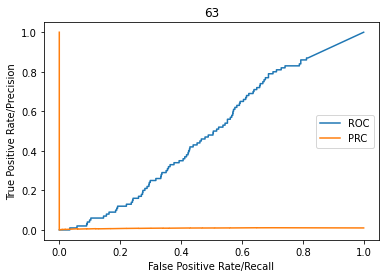

PRC AUC:0.008980627484349194
ROC AUC:0.49359191919191925


In [72]:
fpr64, tpr64, thresholds64 = roc_curve(Y_test[:,63], probs[:, 63])
prec64, recall64, thresholds64 = precision_recall_curve(Y_test[:,63], probs[:, 63])

plt.plot(fpr64,tpr64,label="ROC")
plt.plot(recall64,prec64,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('63')
plt.show()

print("PRC AUC:" + str(auc(recall64, prec64)))
print("ROC AUC:" + str(auc(fpr64, tpr64)))

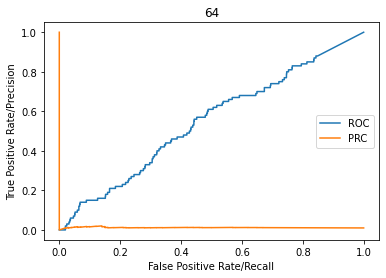

PRC AUC:0.011628775073992792
ROC AUC:0.5473656565656566


In [73]:
fpr65, tpr65, thresholds65 = roc_curve(Y_test[:,64], probs[:, 64])
prec65, recall65, thresholds65 = precision_recall_curve(Y_test[:,64], probs[:, 64])

plt.plot(fpr65,tpr65,label="ROC")
plt.plot(recall65,prec65,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('64')
plt.show()

print("PRC AUC:" + str(auc(recall65, prec65)))
print("ROC AUC:" + str(auc(fpr65, tpr65)))

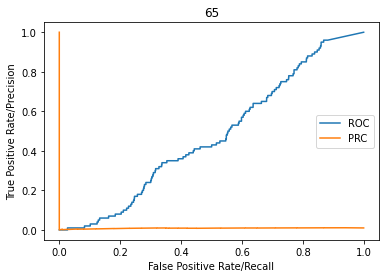

PRC AUC:0.008646217872069158
ROC AUC:0.47423838383838385


In [74]:
fpr66, tpr66, thresholds66 = roc_curve(Y_test[:,65], probs[:, 65])
prec66, recall66, thresholds66 = precision_recall_curve(Y_test[:,65], probs[:, 65])

plt.plot(fpr66,tpr66,label="ROC")
plt.plot(recall66,prec66,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('65')
plt.show()

print("PRC AUC:" + str(auc(recall66, prec66)))
print("ROC AUC:" + str(auc(fpr66, tpr66)))

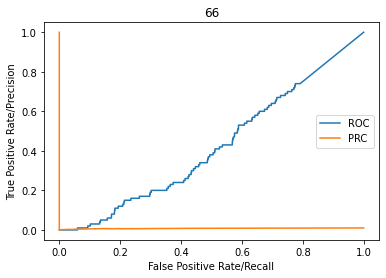

PRC AUC:0.007810686462830246
ROC AUC:0.4217161616161616


In [75]:
fpr67, tpr67, thresholds67 = roc_curve(Y_test[:,66], probs[:, 66])
prec67, recall67, thresholds67 = precision_recall_curve(Y_test[:,66], probs[:, 66])

plt.plot(fpr67,tpr67,label="ROC")
plt.plot(recall67,prec67,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('66')
plt.show()

print("PRC AUC:" + str(auc(recall67, prec67)))
print("ROC AUC:" + str(auc(fpr67, tpr67)))

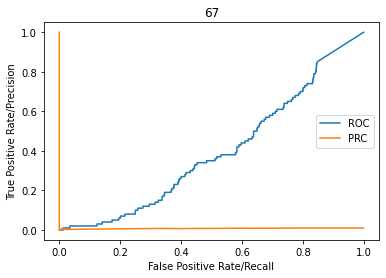

PRC AUC:0.007441144550283834
ROC AUC:0.3952070707070707


In [76]:
fpr68, tpr68, thresholds68 = roc_curve(Y_test[:,67], probs[:, 67])
prec68, recall68, thresholds68 = precision_recall_curve(Y_test[:,67], probs[:, 67])

plt.plot(fpr68,tpr68,label="ROC")
plt.plot(recall68,prec68,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('67')
plt.show()

print("PRC AUC:" + str(auc(recall68, prec68)))
print("ROC AUC:" + str(auc(fpr68, tpr68)))

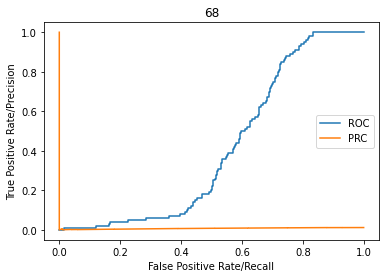

PRC AUC:0.007659461261727565
ROC AUC:0.4092343434343434


In [77]:
fpr69, tpr69, thresholds69 = roc_curve(Y_test[:,68], probs[:, 68])
prec69, recall69, thresholds69 = precision_recall_curve(Y_test[:,68], probs[:, 68])

plt.plot(fpr69,tpr69,label="ROC")
plt.plot(recall69,prec69,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('68')
plt.show()

print("PRC AUC:" + str(auc(recall69, prec69)))
print("ROC AUC:" + str(auc(fpr69, tpr69)))

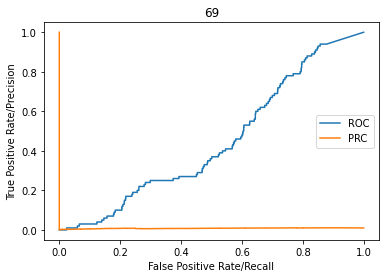

PRC AUC:0.008190556016821273
ROC AUC:0.4454969696969697


In [78]:
fpr70, tpr70, thresholds70 = roc_curve(Y_test[:,69], probs[:, 69])
prec70, recall70, thresholds70 = precision_recall_curve(Y_test[:,69], probs[:, 69])

plt.plot(fpr70,tpr70,label="ROC")
plt.plot(recall70,prec70,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('69')
plt.show()

print("PRC AUC:" + str(auc(recall70, prec70)))
print("ROC AUC:" + str(auc(fpr70, tpr70)))

### ROC and PRC Curve 70-79

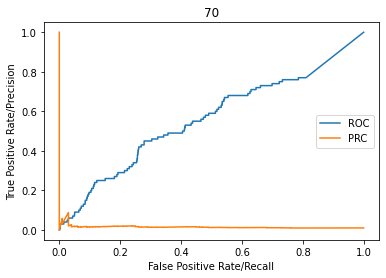

PRC AUC:0.014363404121939838
ROC AUC:0.5603434343434343


In [79]:
fpr71, tpr71, thresholds71 = roc_curve(Y_test[:,70], probs[:,70])
prec71, recall71, thresholds71 = precision_recall_curve(Y_test[:,70], probs[:,70])

plt.plot(fpr71,tpr71,label="ROC")
plt.plot(recall71,prec71,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('70')
plt.show()

print("PRC AUC:" + str(auc(recall71, prec71)))
print("ROC AUC:" + str(auc(fpr71, tpr71)))

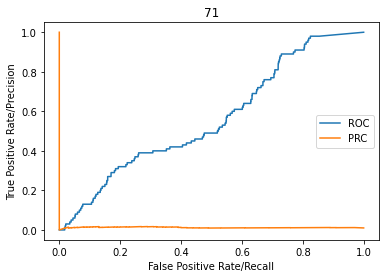

PRC AUC:0.012107986311838894
ROC AUC:0.5621969696969698


In [80]:
fpr72, tpr72, thresholds72 = roc_curve(Y_test[:,71], probs[:, 71])
prec72, recall72, thresholds72 = precision_recall_curve(Y_test[:,71], probs[:, 71])

plt.plot(fpr72,tpr72,label="ROC")
plt.plot(recall72,prec72,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('71')
plt.show()

print("PRC AUC:" + str(auc(recall72, prec72)))
print("ROC AUC:" + str(auc(fpr72, tpr72)))

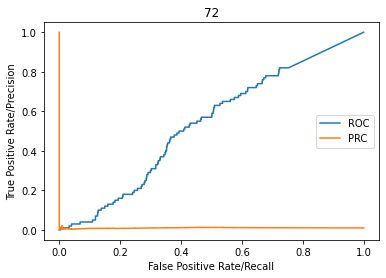

PRC AUC:0.010187724328803695
ROC AUC:0.5348449494949494


In [81]:
fpr73, tpr73, thresholds73 = roc_curve(Y_test[:,72], probs[:, 72])
prec73, recall73, thresholds73 = precision_recall_curve(Y_test[:,72], probs[:, 72])

plt.plot(fpr73,tpr73,label="ROC")
plt.plot(recall73,prec73,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('72')
plt.show()

print("PRC AUC:" + str(auc(recall73, prec73)))
print("ROC AUC:" + str(auc(fpr73, tpr73)))

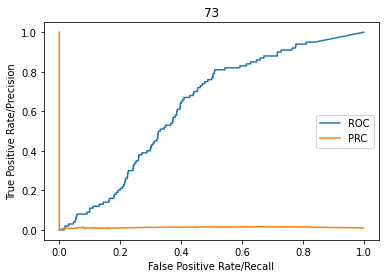

PRC AUC:0.012884776583835753
ROC AUC:0.6268373737373737


In [82]:
fpr74, tpr74, thresholds74 = roc_curve(Y_test[:,73], probs[:, 73])
prec74, recall74, thresholds74 = precision_recall_curve(Y_test[:,73], probs[:, 73])

plt.plot(fpr74,tpr74,label="ROC")
plt.plot(recall74,prec74,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('73')
plt.show()

print("PRC AUC:" + str(auc(recall74, prec74)))
print("ROC AUC:" + str(auc(fpr74, tpr74)))

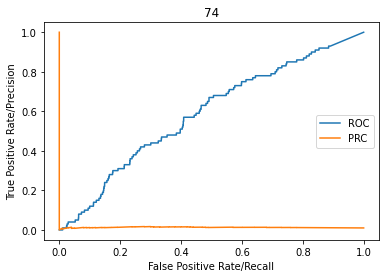

PRC AUC:0.012592410683707088
ROC AUC:0.5889747474747474


In [83]:
fpr75, tpr75, thresholds75 = roc_curve(Y_test[:,74], probs[:, 74])
prec75, recall75, thresholds75 = precision_recall_curve(Y_test[:,74], probs[:, 74])

plt.plot(fpr75,tpr75,label="ROC")
plt.plot(recall75,prec75,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('74')
plt.show()

print("PRC AUC:" + str(auc(recall75, prec75)))
print("ROC AUC:" + str(auc(fpr75, tpr75)))

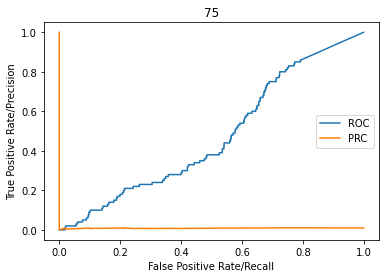

PRC AUC:0.00892160450437255
ROC AUC:0.47294848484848484


In [84]:
fpr76, tpr76, thresholds76 = roc_curve(Y_test[:,75], probs[:, 75])
prec76, recall76, thresholds76 = precision_recall_curve(Y_test[:,75], probs[:, 75])

plt.plot(fpr76,tpr76,label="ROC")
plt.plot(recall76,prec76,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('75')
plt.show()

print("PRC AUC:" + str(auc(recall76, prec76)))
print("ROC AUC:" + str(auc(fpr76, tpr76)))

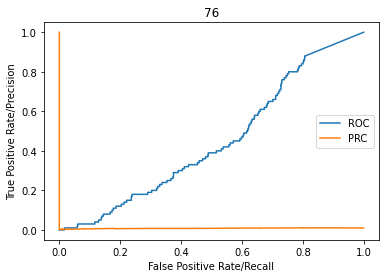

PRC AUC:0.008222724623001552
ROC AUC:0.44759292929292926


In [85]:
fpr77, tpr77, thresholds77 = roc_curve(Y_test[:,76], probs[:, 76])
prec77, recall77, thresholds77 = precision_recall_curve(Y_test[:,76], probs[:, 76])

plt.plot(fpr77,tpr77,label="ROC")
plt.plot(recall77,prec77,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('76')
plt.show()

print("PRC AUC:" + str(auc(recall77, prec77)))
print("ROC AUC:" + str(auc(fpr77, tpr77)))

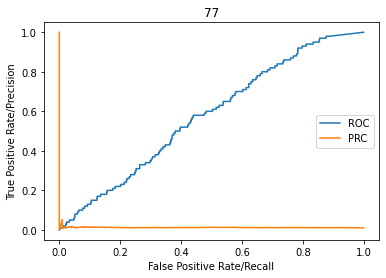

PRC AUC:0.012230274485806034
ROC AUC:0.5772257575757576


In [86]:
fpr78, tpr78, thresholds78 = roc_curve(Y_test[:,77], probs[:, 77])
prec78, recall78, thresholds78 = precision_recall_curve(Y_test[:,77], probs[:, 77])

plt.plot(fpr78,tpr78,label="ROC")
plt.plot(recall78,prec78,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('77')
plt.show()

print("PRC AUC:" + str(auc(recall78, prec78)))
print("ROC AUC:" + str(auc(fpr78, tpr78)))

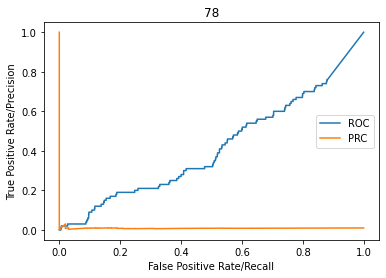

PRC AUC:0.008467963860972389
ROC AUC:0.4156777777777778


In [87]:
fpr79, tpr79, thresholds79 = roc_curve(Y_test[:,78], probs[:, 78])
prec79, recall79, thresholds79 = precision_recall_curve(Y_test[:,78], probs[:, 78])

plt.plot(fpr79,tpr79,label="ROC")
plt.plot(recall79,prec79,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('78')
plt.show()

print("PRC AUC:" + str(auc(recall79, prec79)))
print("ROC AUC:" + str(auc(fpr79, tpr79)))

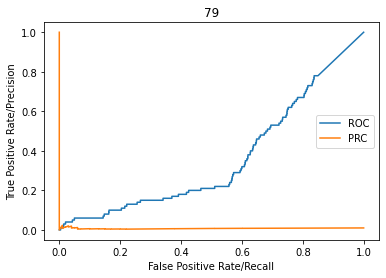

PRC AUC:0.00763453738256888
ROC AUC:0.3596969696969696


In [88]:
fpr80, tpr80, thresholds80 = roc_curve(Y_test[:,79], probs[:, 79])
prec80, recall80, thresholds80 = precision_recall_curve(Y_test[:,79], probs[:, 79])

plt.plot(fpr80,tpr80,label="ROC")
plt.plot(recall80,prec80,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('79')
plt.show()

print("PRC AUC:" + str(auc(recall80, prec80)))
print("ROC AUC:" + str(auc(fpr80, tpr80)))

### ROC and PRC Curve 80-89

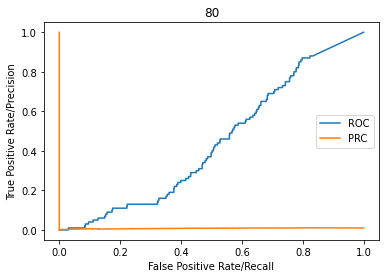

PRC AUC:0.008032119835404495
ROC AUC:0.43952929292929294


In [89]:
fpr81, tpr81, thresholds81 = roc_curve(Y_test[:,80], probs[:,80])
prec81, recall81, thresholds81 = precision_recall_curve(Y_test[:,80], probs[:,80])

plt.plot(fpr81,tpr81,label="ROC")
plt.plot(recall81,prec81,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('80')
plt.show()

print("PRC AUC:" + str(auc(recall81, prec81)))
print("ROC AUC:" + str(auc(fpr81, tpr81)))

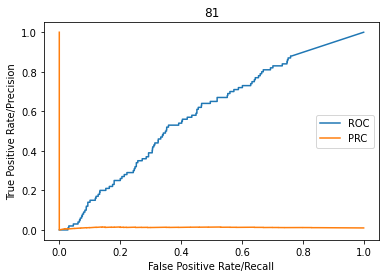

PRC AUC:0.012105112896085408
ROC AUC:0.5864525252525253


In [90]:
fpr82, tpr82, thresholds82 = roc_curve(Y_test[:,81], probs[:, 81])
prec82, recall82, thresholds82 = precision_recall_curve(Y_test[:,81], probs[:, 81])

plt.plot(fpr82,tpr82,label="ROC")
plt.plot(recall82,prec82,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('81')
plt.show()

print("PRC AUC:" + str(auc(recall82, prec82)))
print("ROC AUC:" + str(auc(fpr82, tpr82)))

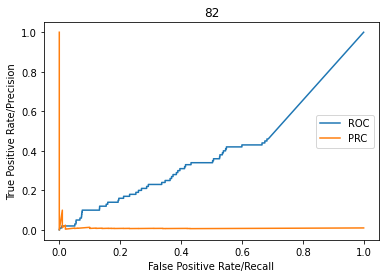

PRC AUC:0.008582914684750606
ROC AUC:0.4008464646464646


In [91]:
fpr83, tpr83, thresholds83 = roc_curve(Y_test[:,82], probs[:, 82])
prec83, recall83, thresholds83 = precision_recall_curve(Y_test[:,82], probs[:, 82])

plt.plot(fpr83,tpr83,label="ROC")
plt.plot(recall83,prec83,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('82')
plt.show()

print("PRC AUC:" + str(auc(recall83, prec83)))
print("ROC AUC:" + str(auc(fpr83, tpr83)))

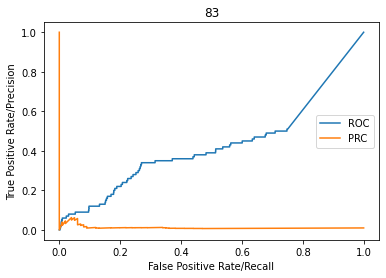

PRC AUC:0.011453171802027986
ROC AUC:0.42695000000000005


In [92]:
fpr84, tpr84, thresholds84 = roc_curve(Y_test[:,83], probs[:, 83])
prec84, recall84, thresholds84 = precision_recall_curve(Y_test[:,83], probs[:, 83])

plt.plot(fpr84,tpr84,label="ROC")
plt.plot(recall84,prec84,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('83')
plt.show()

print("PRC AUC:" + str(auc(recall84, prec84)))
print("ROC AUC:" + str(auc(fpr84, tpr84)))

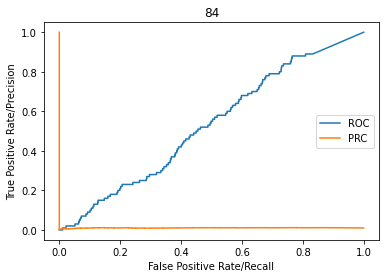

PRC AUC:0.010225601709911911
ROC AUC:0.5296555555555554


In [93]:
fpr85, tpr85, thresholds85 = roc_curve(Y_test[:,84], probs[:, 84])
prec85, recall85, thresholds85 = precision_recall_curve(Y_test[:,84], probs[:, 84])

plt.plot(fpr85,tpr85,label="ROC")
plt.plot(recall85,prec85,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('84')
plt.show()

print("PRC AUC:" + str(auc(recall85, prec85)))
print("ROC AUC:" + str(auc(fpr85, tpr85)))

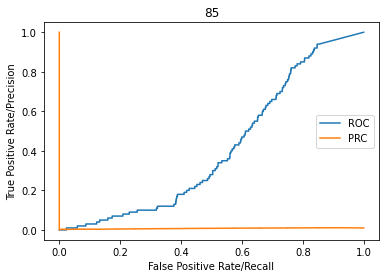

PRC AUC:0.0075805276339343045
ROC AUC:0.40930606060606056


In [94]:
fpr86, tpr86, thresholds86 = roc_curve(Y_test[:,85], probs[:, 85])
prec86, recall86, thresholds86 = precision_recall_curve(Y_test[:,85], probs[:, 85])

plt.plot(fpr86,tpr86,label="ROC")
plt.plot(recall86,prec86,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('85')
plt.show()

print("PRC AUC:" + str(auc(recall86, prec86)))
print("ROC AUC:" + str(auc(fpr86, tpr86)))

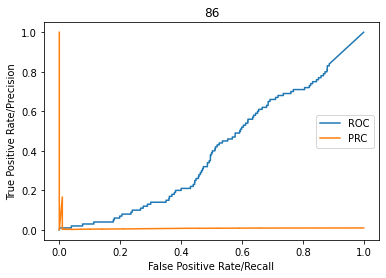

PRC AUC:0.008329795301758071
ROC AUC:0.40170454545454537


In [95]:
fpr87, tpr87, thresholds87 = roc_curve(Y_test[:,86], probs[:, 86])
prec87, recall87, thresholds87 = precision_recall_curve(Y_test[:,86], probs[:, 86])

plt.plot(fpr87,tpr87,label="ROC")
plt.plot(recall87,prec87,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('86')
plt.show()

print("PRC AUC:" + str(auc(recall87, prec87)))
print("ROC AUC:" + str(auc(fpr87, tpr87)))

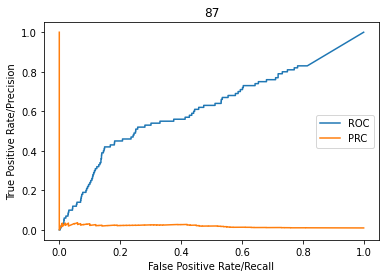

PRC AUC:0.018212719674550397
ROC AUC:0.6166954545454545


In [96]:
fpr88, tpr88, thresholds88 = roc_curve(Y_test[:,87], probs[:, 87])
prec88, recall88, thresholds88 = precision_recall_curve(Y_test[:,87], probs[:, 87])

plt.plot(fpr88,tpr88,label="ROC")
plt.plot(recall88,prec88,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('87')
plt.show()

print("PRC AUC:" + str(auc(recall88, prec88)))
print("ROC AUC:" + str(auc(fpr88, tpr88)))

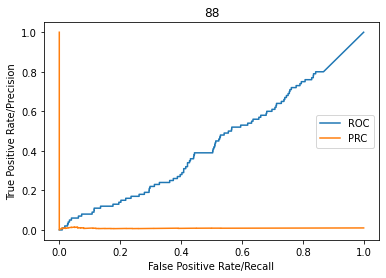

PRC AUC:0.008708173258426497
ROC AUC:0.4391222222222222


In [97]:
fpr89, tpr89, thresholds89 = roc_curve(Y_test[:,88], probs[:, 88])
prec89, recall89, thresholds89 = precision_recall_curve(Y_test[:,88], probs[:, 88])

plt.plot(fpr89,tpr89,label="ROC")
plt.plot(recall89,prec89,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('88')
plt.show()

print("PRC AUC:" + str(auc(recall89, prec89)))
print("ROC AUC:" + str(auc(fpr89, tpr89)))

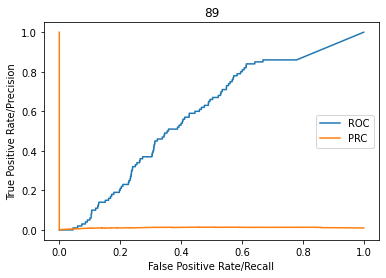

PRC AUC:0.011511109557747534
ROC AUC:0.5849353535353535


In [98]:
fpr90, tpr90, thresholds90 = roc_curve(Y_test[:,89], probs[:, 89])
prec90, recall90, thresholds90 = precision_recall_curve(Y_test[:,89], probs[:, 89])

plt.plot(fpr90,tpr90,label="ROC")
plt.plot(recall90,prec90,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('89')
plt.show()

print("PRC AUC:" + str(auc(recall90, prec90)))
print("ROC AUC:" + str(auc(fpr90, tpr90)))

### ROC and PRC Curve 90-99

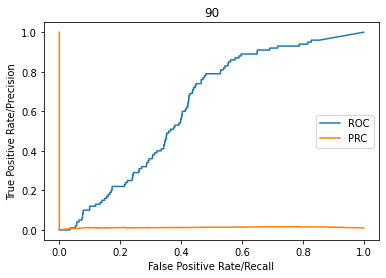

PRC AUC:0.012551440427218355
ROC AUC:0.625680808080808


In [99]:
fpr91, tpr91, thresholds91 = roc_curve(Y_test[:,90], probs[:,90])
prec91, recall91, thresholds91 = precision_recall_curve(Y_test[:,90], probs[:,90])

plt.plot(fpr91,tpr91,label="ROC")
plt.plot(recall91,prec91,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('90')
plt.show()

print("PRC AUC:" + str(auc(recall91, prec91)))
print("ROC AUC:" + str(auc(fpr91, tpr91)))

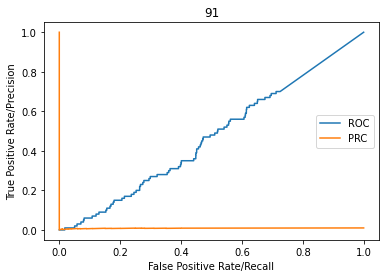

PRC AUC:0.00879043173758204
ROC AUC:0.4699242424242424


In [100]:
fpr92, tpr92, thresholds92 = roc_curve(Y_test[:,91], probs[:, 91])
prec92, recall92, thresholds92 = precision_recall_curve(Y_test[:,91], probs[:, 91])

plt.plot(fpr92,tpr92,label="ROC")
plt.plot(recall92,prec92,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('91')
plt.show()

print("PRC AUC:" + str(auc(recall92, prec92)))
print("ROC AUC:" + str(auc(fpr92, tpr92)))

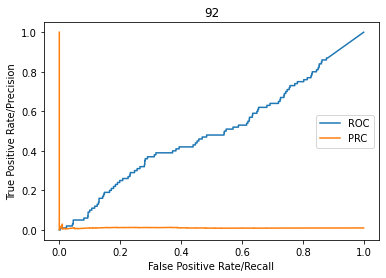

PRC AUC:0.010075960538661529
ROC AUC:0.4907005050505051


In [101]:
fpr93, tpr93, thresholds93 = roc_curve(Y_test[:,92], probs[:, 92])
prec93, recall93, thresholds93 = precision_recall_curve(Y_test[:,92], probs[:, 92])

plt.plot(fpr93,tpr93,label="ROC")
plt.plot(recall93,prec93,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('92')
plt.show()

print("PRC AUC:" + str(auc(recall93, prec93)))
print("ROC AUC:" + str(auc(fpr93, tpr93)))

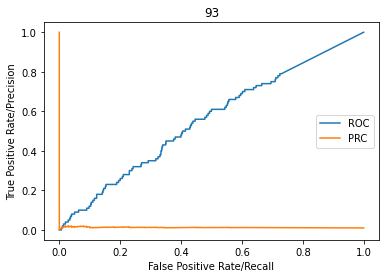

PRC AUC:0.012106417425037076
ROC AUC:0.5555747474747474


In [102]:
fpr94, tpr94, thresholds94 = roc_curve(Y_test[:,93], probs[:, 93])
prec94, recall94, thresholds94 = precision_recall_curve(Y_test[:,93], probs[:, 93])

plt.plot(fpr94,tpr94,label="ROC")
plt.plot(recall94,prec94,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('93')
plt.show()

print("PRC AUC:" + str(auc(recall94, prec94)))
print("ROC AUC:" + str(auc(fpr94, tpr94)))

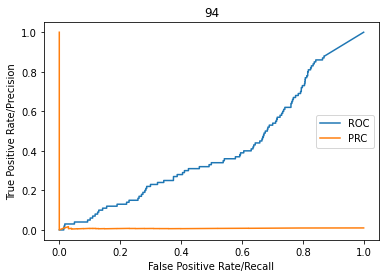

PRC AUC:0.008000829125251206
ROC AUC:0.4079505050505051


In [103]:
fpr95, tpr95, thresholds95 = roc_curve(Y_test[:,94], probs[:, 94])
prec95, recall95, thresholds95 = precision_recall_curve(Y_test[:,94], probs[:, 94])

plt.plot(fpr95,tpr95,label="ROC")
plt.plot(recall95,prec95,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('94')
plt.show()

print("PRC AUC:" + str(auc(recall95, prec95)))
print("ROC AUC:" + str(auc(fpr95, tpr95)))

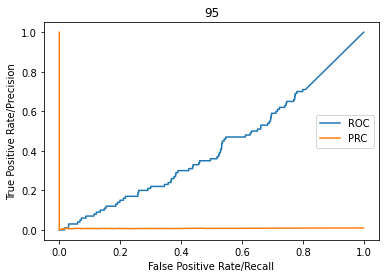

PRC AUC:0.00807904229295189
ROC AUC:0.41761464646464647


In [104]:
fpr96, tpr96, thresholds96 = roc_curve(Y_test[:,95], probs[:, 95])
prec96, recall96, thresholds96 = precision_recall_curve(Y_test[:,95], probs[:, 95])

plt.plot(fpr96,tpr96,label="ROC")
plt.plot(recall96,prec96,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('95')
plt.show()

print("PRC AUC:" + str(auc(recall96, prec96)))
print("ROC AUC:" + str(auc(fpr96, tpr96)))

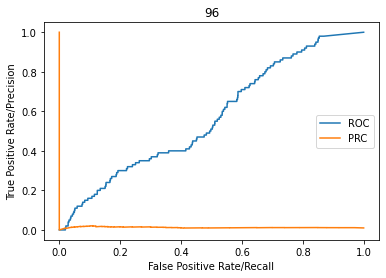

PRC AUC:0.012399437754064064
ROC AUC:0.5676696969696969


In [105]:
fpr97, tpr97, thresholds97 = roc_curve(Y_test[:,96], probs[:, 96])
prec97, recall97, thresholds97 = precision_recall_curve(Y_test[:,96], probs[:, 96])

plt.plot(fpr97,tpr97,label="ROC")
plt.plot(recall97,prec97,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('96')
plt.show()

print("PRC AUC:" + str(auc(recall97, prec97)))
print("ROC AUC:" + str(auc(fpr97, tpr97)))

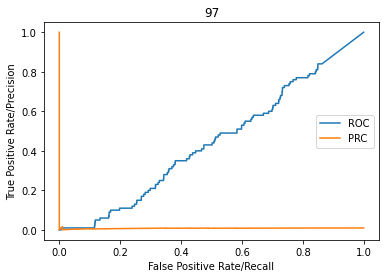

PRC AUC:0.008229531009121658
ROC AUC:0.4423858585858586


In [106]:
fpr98, tpr98, thresholds28 = roc_curve(Y_test[:,97], probs[:, 97])
prec98, recall98, thresholds28 = precision_recall_curve(Y_test[:,97], probs[:, 97])

plt.plot(fpr98,tpr98,label="ROC")
plt.plot(recall98,prec98,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('97')
plt.show()

print("PRC AUC:" + str(auc(recall98, prec98)))
print("ROC AUC:" + str(auc(fpr98, tpr98)))

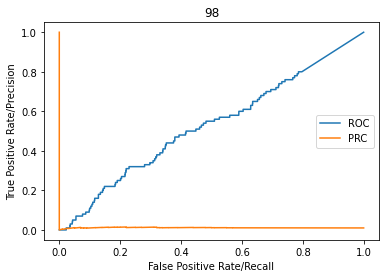

PRC AUC:0.010887076189619756
ROC AUC:0.5269181818181817


In [107]:
fpr99, tpr99, thresholds99 = roc_curve(Y_test[:,98], probs[:, 98])
prec99, recall99, thresholds99 = precision_recall_curve(Y_test[:,98], probs[:, 98])

plt.plot(fpr99,tpr99,label="ROC")
plt.plot(recall99,prec99,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('98')
plt.show()

print("PRC AUC:" + str(auc(recall99, prec99)))
print("ROC AUC:" + str(auc(fpr99, tpr99)))

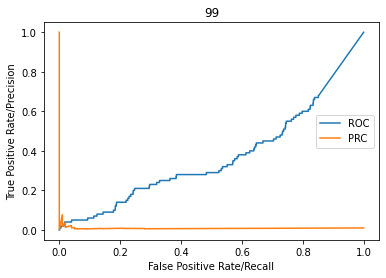

PRC AUC:0.008314590158499072
ROC AUC:0.3699939393939394


In [108]:
fpr100, tpr100, thresholds100 = roc_curve(Y_test[:,99], probs[:, 99])
prec100, recall100, thresholds100 = precision_recall_curve(Y_test[:,99], probs[:, 99])

plt.plot(fpr100,tpr100,label="ROC")
plt.plot(recall100,prec100,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('99')
plt.show()

print("PRC AUC:" + str(auc(recall100, prec100)))
print("ROC AUC:" + str(auc(fpr100, tpr100)))